# Minesweeper Algorithm Analysis

The objective of this analysis is to better understand the perfrmance of the minesweeper algorithm.<br><br>
Here, I'm only analysing hard mode games, but you can see what the results are with other modes using the data collected from "benchmarks.py".

## Importing Data 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("minesweeper_data")
df

,id,won,time,main_strategy,strategies
0,1,0,0.001007,3,3
1,2,0,0.002004,3,123
2,3,0,0.011514,3,123
3,4,0,0.023955,3,123
4,5,0,0.026354,3,123
...,...,...,...,...,...
9995,9996,0,0.003015,3,13
9996,9997,0,0.025000,3,123
9997,9998,0,0.015011,3,123
9998,9999,0,0.016079,3,123


In [2]:
df.describe()

,id,won,time,main_strategy,strategies
count,10000.00000,10000.000000,10000.000000,10000.00000,10000.000000
mean,5000.50000,0.065400,0.016317,2.88400,92.749400
std,2886.89568,0.247243,0.013266,0.46751,49.923328
min,1.00000,0.000000,0.000000,1.00000,1.000000
25%,2500.75000,0.000000,0.004521,3.00000,13.000000
50%,5000.50000,0.000000,0.015003,3.00000,123.000000
75%,7500.25000,0.000000,0.023907,3.00000,123.000000
max,10000.00000,1.000000,0.104189,3.00000,123.000000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             10000 non-null  int64  
 1   won            10000 non-null  int64  
 2   time           10000 non-null  float64
 3   main_strategy  10000 non-null  int64  
 4   strategies     10000 non-null  int64  
dtypes: float64(1), int64(4)
memory usage: 390.8 KB


## Treating Data 

In [4]:
# Change Main Strategies Name
df["main_strategy"] = df["main_strategy"].replace({1: "Default", 2: "Simulations", 3:"Guesses"})

# Change Strategies to string (easier to manipulate)
df["strategies"] = df["strategies"].astype(str)

## Analysis 

OBSERVATION: since the games are randomly created, it's likely the data presented will slighly chance if you run the "benchmarks.py" file again. Therefore, the conclusions at the end of each session will not consider the specific number analysed, but rather an approximation (example: instead of 51.43%, the conclusion will consider about 50%).

### Accuracy Performance 

In [5]:
# Win rate
win_rate = df["won"].mean()
print(f"Win Rate: {round(100 * win_rate, 2)}%")

Win Rate: 6.54%


In [6]:
# What strategy made it lose?
main_strategies_losses = df[df["won"] == 0].groupby("main_strategy").count() / len(df[df["won"] == 0])
main_strategies_losses

,id,won,time,strategies
main_strategy,,,,
Guesses,1.0,1.0,1.0,1.0


In [7]:
# How much each strategy was used in the games that were won?
games_won = df[df["won"] == 1]
n_strategy1 = len(games_won[games_won["strategies"].str.contains("1")])
n_strategy2 = len(games_won[games_won["strategies"].str.contains("2")])
n_strategy3 = len(games_won[games_won["strategies"].str.contains("3")])

print(f"Default : {round(100 * n_strategy1 / len(games_won), 2)}% of games that were won")
print(f"Simulations : {round(100 * n_strategy2 / len(games_won), 2)}% of games that were won")
print(f"Guesses : {round(100 * n_strategy3 / len(games_won), 2)}% of games that were won")

Default : 100.0% of games that were won
Simulations : 95.11% of games that were won
Guesses : 84.25% of games that were won


In [8]:
# How many games were won just using the Default Strategy?
# How many games did the algorithm had to guess in total?
# How many guesses where correct?
n_just_strategy1 = len(games_won[games_won["strategies"] == "1"])
n_strategy3_total = len(df[df["strategies"].str.contains("3")])

print(f"Games that just used Default Strategy to win: {round(100 * n_just_strategy1 / len(games_won), 2)}% of games that were won")
print(f"Games were the algorithm had to guess: {round(100 * n_strategy3_total / len(df), 2)}% of total games")
print(f"Rate of correct guesses: {round(100 * n_strategy3 / n_strategy3_total, 2)}%")

Games that just used Default Strategy to win: 1.99% of games that were won
Games were the algorithm had to guess: 98.97% of total games
Rate of correct guesses: 5.57%


As we can see, the algorithm can win about 6% of games in hard mode. According to my research, most algorithms perform around 5%, as well as good players, so this seem as a quite good win rate.<br><br>
In the second cell, we also see that all games where lost due to guessing. This is to be expected, since the other two strategies were created to always be corrected, so this confirms that the algorithm is working as intended.<br><br>
In the third cell, we can see the default strategy was used in all games that were won (again, to be expected), simulations where used in almost 100% of the games (which probably means that this strategy was very useful) and the algorithm had to guess in more than 80% of the games that were won.<br><br>
Finally, we can see that only a very small porcentage (2%) of the games were won just using the Default Strategy. This gives more evidence to the hypothesis that, using only this strategy, you can't win a lot of games in hard mode. We also discover that we have to guess in almost all the games, with a sucess guess rate of only about 5%.

### Time Performance 

In [9]:
# Average time and time divided by wins and losses (in seconds)
avg_time_total = df["time"].mean()
avg_time_wins = df[df["won"] == 1]["time"].mean()
avg_time_losses = df[df["won"] == 0]["time"].mean()

print(f"Average Time: {round(avg_time_total, 5)} seconds")
print(f"Average Time for Wins: {round(avg_time_wins, 5)} seconds")
print(f"Average Time for Losses: {round(avg_time_losses, 5)} seconds")
print(f"On average, the algorithm can play {round(1 / avg_time_total)} games in one second")

Average Time: 0.01632 seconds
Average Time for Wins: 0.02935 seconds
Average Time for Losses: 0.0154 seconds
On average, the algorithm can play 61 games in one second


In [10]:
# Slowest and Fastest games (only considering wins, since a lost game can end almost instantaneously)
slowest_game_time = df[df["won"] == 1]["time"].max()
fastest_game_time = df[df["won"] == 1]["time"].min()

print(f"Slowest Game Time: {round(slowest_game_time, 5)} seconds")
print(f"Fastest Game Time: {round(fastest_game_time, 5)} seconds")

Slowest Game Time: 0.09781 seconds
Fastest Game Time: 0.014 seconds


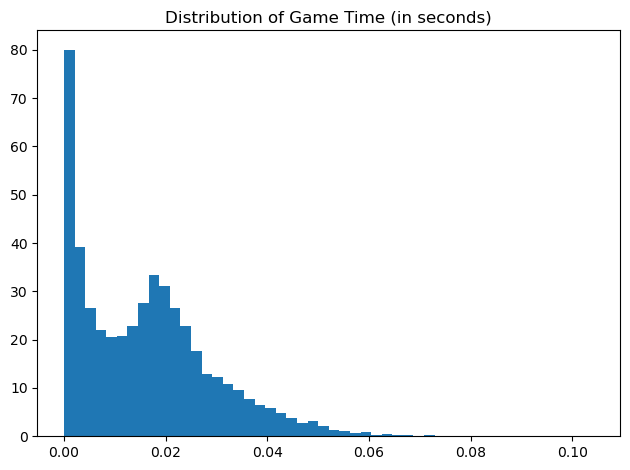

In [11]:
# Distribution of time used
fig, ax = plt.subplots(tight_layout=True)
n_bins = 50
ax.hist(df["time"], bins=n_bins, density=True)
plt.title("Distribution of Game Time (in seconds)")
plt.show()

As we can see, the algorithm speed is always quite close to 0.01 seconds. Even on its slowest game, the speed still marks under 0.1 seconds. Since these number are way too low for us to understand, i showed it can play more than 60 games in just one second.<br><br>
The histogram shows that the majority of the games lie close to 0.02 seconds of run time (the concentration of games close to 0.00 seconds is probably due to games that were only early using guesses in the first few moves).<br><br>
When I started this project, my objective was for the algorithm to always perform in under 2 seconds, so I'm pretty satisfied with the results.<br><br>
OBSERVATION: time performance will vary a lot depending on the machine you're running your code and other factors, such as how much your memory is being used at the time. However, it's likely the algorithm will perform under 0.1 seconds in all situations.

### Conclusion 

In terms of time, the algorithm performs really well.<br><br>
In terms of win rate, however, it's difficulty to analyse without a comparison. I found this article made by Harvard (https://dash.harvard.edu/bitstream/handle/1/14398552/BECERRA-SENIORTHESIS-2015.pdf) that creates different algorithmic approaches to the minesweeper game. There, we can see that the first 5 models (described in Chapter 5) win less than 2% of games in hard mode (which they call expert mode). However, the next 2 models (described in Chapter 6), win about 30% of games in the same difficulty, showing that there's room por improvement in my algorithm, although it would need to get a lot more complex.<br><br>Probably the first place to make changes is the guessing strategy, since it only got a few guesses correct.